In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df=pd.read_csv('Coursera.csv')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 2858: invalid start byte

In [4]:
df.drop('URL',inplace=True,axis=1)
df.head()

NameError: name 'df' is not defined

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df['Rating'].unique()

array(['4.5', '4.9', '4.7', '4.8', '4.6', 'Not available', '4.4', '4.2',
       '4.3'], dtype=object)

In [51]:
df = df[df['Rating'] != 'Not available']
df['Rating'] = df['Rating'].astype(float)
df

,Title,Offered by,Level,Rating,Description,Skills
0,Microsoft Azure Data Scientist Associate (DP-1...,Microsoft,Intermediate,4.5,This Professional Certificate is intended for ...,Manage Azure resources for machine learning De...
1,Machine Learning Specialization,Stanford University,Beginner,4.9,The Machine Learning Specialization is a found...,Decision Trees Artificial Neural Network Logis...
2,Machine Learning Engineering for Production (M...,DeepLearning.AI,Advanced,4.7,Understanding machine learning and deep learni...,Managing Machine Learning Production Systems D...
3,Fundamentals of Machine Learning for Healthcare,Stanford University,Beginner,4.8,Machine learning and artificial intelligence h...,Machine learning Biostatistics Traditional com...
4,IBM Machine Learning Professional Certificate,IBM,Intermediate,4.6,Machine Learning is one of the most in-demand ...,Artificial Intelligence (AI) Machine Learning ...
...,...,...,...,...,...,...
83,Modern Application Development with Python on ...,AWS,Beginner,4.7,This specialization is designed to help you ma...,Amazon Dynamodb Cloud Computing Architecture S...
84,Assess for Success: Marketing Analytics and Me...,Google,Beginner,4.6,Assess for Success: Marketing Analytics and Me...,Digital marketing KPIs Spreadsheet management ...
85,Foundations of Digital Marketing and E-commerce,Google,Beginner,4.8,This is the first of seven courses in the Goog...,Marketing Customer loyalty E-Commerce Marketin...
86,From Likes to Leads: Interact with Customers O...,Google,Beginner,4.8,From Likes to Leads: Interact with Customers O...,Social Listening Social Media Bidding Customer...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 87
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        78 non-null     object 
 1   Offered by   78 non-null     object 
 2   Level        78 non-null     object 
 3   Rating       78 non-null     float64
 4   Description  78 non-null     object 
 5   Skills       78 non-null     object 
dtypes: float64(1), object(5)
memory usage: 4.3+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


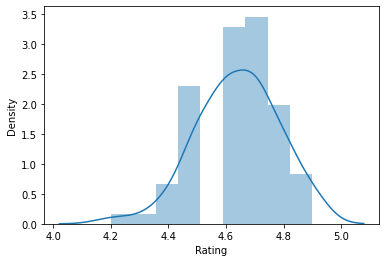

In [53]:
sns.distplot(df['Rating'])
plt.show()

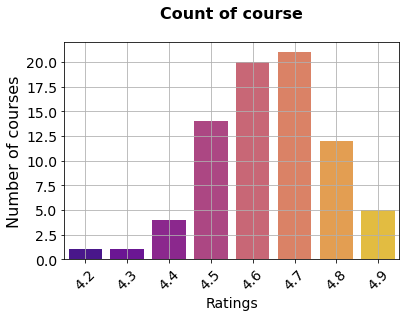

In [54]:
plt.figure()
sns.countplot(data=df,x='Rating',palette='plasma')
plt.xlabel('Ratings',fontsize='14')
plt.ylabel('Number of courses',fontsize='16')
plt.xticks(fontsize='14')
plt.yticks(fontsize='14')
plt.title("Count of course\n",fontsize=16,fontweight='bold')
plt.xticks(rotation = 45)
plt.grid()

In [55]:
df['Rating'].value_counts()

4.7    21
4.6    20
4.5    14
4.8    12
4.9     5
4.4     4
4.2     1
4.3     1
Name: Rating, dtype: int64

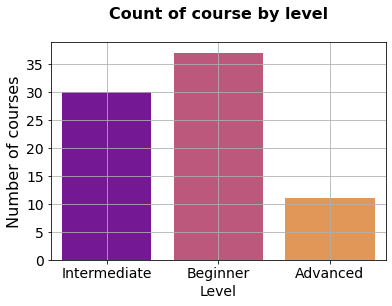

In [56]:
plt.figure()
sns.countplot(data=df,x='Level',palette='plasma')
plt.xlabel('Level',fontsize='14')
plt.ylabel('Number of courses',fontsize='16')
plt.xticks(fontsize='14')
plt.yticks(fontsize='14')
plt.title("Count of course by level\n",fontsize=16,fontweight='bold')
plt.grid()

In [57]:
df['Level'].value_counts()

Beginner        37
Intermediate    30
Advanced        11
Name: Level, dtype: int64

In [7]:
df['Course Name']=df['Course Name'].apply(lambda x:x.replace(':',' '))
df['Course Name']=df['Course Name'].apply(lambda x:x.replace(',',' '))
df['Course Name']=df['Course Name'].apply(lambda x:x.replace('-',' '))

df['Course Description']=df['Course Description'].apply(lambda x:x.replace('-',' '))
df['Course Description']=df['Course Description'].apply(lambda x:x.replace('.',' '))
df['Course Description']=df['Course Description'].apply(lambda x:x.replace(':',' '))
df['Course Description']=df['Course Description'].apply(lambda x:x.replace(',',' '))

df['Skills']=df['Skills'].apply(lambda x:x.replace('-',' '))
df['Skills']=df['Skills'].apply(lambda x:x.replace('.',' '))
df['Skills']=df['Skills'].apply(lambda x:x.replace(':',' '))
df['Skills']=df['Skills'].apply(lambda x:x.replace(',',' '))
df['Skills']=df['Skills'].apply(lambda x:x.replace('(',' '))
df['Skills']=df['Skills'].apply(lambda x:x.replace(')',' '))

In [8]:
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,By the end of this guided project you will be...,Finance business plan persona user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,When it comes to numbers there is always more...,accounts receivable dupont analysis analysis...
4,Retrieve Data using Single Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select sql database manageme...


In [10]:
df['Final Col']=df['Course Name']+' '+df['Course Description']+' '+df['Skills']
df['Final Col']

0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy  Business Model Canvas Analy...
2       Silicon Thin Film Solar Cells This course cons...
3       Finance for Managers When it comes to numbers ...
4       Retrieve Data using Single Table SQL Queries I...
                              ...                        
3517    Capstone  Retrieving  Processing  and Visualiz...
3518    Patrick Henry  Forgotten Founder �Give me libe...
3519    Business intelligence and data analytics  Gene...
3520    Rigid Body Dynamics This course teaches dynami...
3521    Architecting with Google Kubernetes Engine  Pr...
Name: Final Col, Length: 3522, dtype: object

In [11]:
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Final Col
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write A Feature Length Screenplay For Film Or ...
1,Business Strategy Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,By the end of this guided project you will be...,Finance business plan persona user experien...,Business Strategy Business Model Canvas Analy...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Silicon Thin Film Solar Cells This course cons...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,When it comes to numbers there is always more...,accounts receivable dupont analysis analysis...,Finance for Managers When it comes to numbers ...
4,Retrieve Data using Single Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select sql database manageme...,Retrieve Data using Single Table SQL Queries I...


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english')


df['Final Col'] = df['Final Col'].fillna('')


tfidf_matrix = tfidf.fit_transform(df['Final Col'])
tfidf_matrix
print(tfidf_matrix)

  (0, 1515)	0.03349720491132073
  (0, 12431)	0.038267100837644334
  (0, 9040)	0.03442247817653769
  (0, 1546)	0.03422994309322112
  (0, 16979)	0.0603118600640067
  (0, 19931)	0.057170009937248495
  (0, 5369)	0.05383951459213945
  (0, 5757)	0.04468090304115966
  (0, 16623)	0.07057028492862867
  (0, 13763)	0.0603118600640067
  (0, 13441)	0.057170009937248495
  (0, 17381)	0.06742843480187047
  (0, 10061)	0.0555419641376831
  (0, 14936)	0.07057028492862867
  (0, 14276)	0.03769755721231779
  (0, 14685)	0.049647387717334165
  (0, 4459)	0.03179475536577708
  (0, 13313)	0.05047794560532526
  (0, 14932)	0.04633678081577199
  (0, 15628)	0.04647719881096351
  (0, 3930)	0.052670788635714706
  (0, 7665)	0.06508175599033031
  (0, 20089)	0.019316666312518393
  (0, 4211)	0.04540887834577484
  (0, 17696)	0.0406642533975691
  :	:
  (3521, 16882)	0.04185003794239548
  (3521, 2664)	0.04518708316581435
  (3521, 1341)	0.0431849321715774
  (3521, 16870)	0.051078027310272035
  (3521, 3891)	0.03097277700068042

In [13]:
print(tfidf)

TfidfVectorizer(stop_words='english')


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(tfidf_matrix)

In [15]:
similarity

array([[1.00000000e+00, 2.35982204e-02, 3.34061571e-02, ...,
        2.66359353e-02, 2.85533215e-02, 1.62959997e-02],
       [2.35982204e-02, 1.00000000e+00, 1.03096010e-02, ...,
        1.07465018e-01, 2.72569868e-03, 3.37555928e-02],
       [3.34061571e-02, 1.03096010e-02, 1.00000000e+00, ...,
        7.04714689e-03, 3.37956445e-02, 5.47443083e-03],
       ...,
       [2.66359353e-02, 1.07465018e-01, 7.04714689e-03, ...,
        1.00000000e+00, 3.42422611e-04, 8.35588376e-03],
       [2.85533215e-02, 2.72569868e-03, 3.37956445e-02, ...,
        3.42422611e-04, 1.00000000e+00, 1.33090964e-03],
       [1.62959997e-02, 3.37555928e-02, 5.47443083e-03, ...,
        8.35588376e-03, 1.33090964e-03, 1.00000000e+00]])

In [17]:
indices = pd.Series(df.index, index=df['Course Name']).drop_duplicates()

In [18]:
from word2number import w2n


In [24]:
def get_recommendations(title,cosine_sim=similarity):
    nu, key = title.split(" ",1)
    number = w2n.word_to_num(nu)
    idx = indices[key]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:number]
    courses = [i[0] for i in sim_scores]

    return df['Course Name'].iloc[courses]

In [37]:
def get_recommendations(title,cosine_sim=similarity):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:3]
    courses = [i[0] for i in sim_scores]

    return df['Course Name'].iloc[courses]

In [40]:
get_recommendations('Agile Projects Developing Tasks with Taiga')

KeyError: 'Agile Projects Developing Tasks with Taiga'

In [94]:
get_recommendations('ten Probabilistic Graphical Models Representation')

KeyError: 'Probabilistic Graphical Models Representation'

In [61]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 

docs=["Machine Learning Specialization The Machine Learning Specialization is a foundational online program created in collaboration between DeepLearning.AI and Stanford Online. This beginner-friendly program will teach you the fundamentals of machine learning and how to use these techniques to build real-world AI applications. This Specialization is taught by Andrew Ng, an AI visionary who has led critical research at Stanford University and groundbreaking work at Google Brain, Baidu, and Landing.AI to advance the AI field.This 3-course Specialization is an updated version of Andrew’s pioneering Machine Learning course, rated 4.9 out of 5 and taken by over 4.8 million learners since it launched in 2012. It provides a broad introduction to modern machine learning, including supervised learning (multiple linear regression, logistic regression, neural networks, and decision trees), unsupervised learning (clustering, dimensionality reduction, recommender systems), and some of the best practices used in Silicon Valley for artificial intelligence and machine learning innovation (evaluating and tuning models, taking a data-centric approach to improving performance) By the end of this Specialization, you will have mastered key concepts and gained the practical know-how to quickly and powerfully apply machine learning to challenging real-world problems. If you’re looking to break into AI or build a career in machine learning, the new Machine Learning Specialization is the best place to start Decision Trees Artificial Neural Network Logistic Regression Recommender Systems Linear Regression Regularization to Avoid Overfitting Gradient Descent Supervised Learning Logistic Regression for Classification Xgboost Tensorflow Tree Ensembles",
      "Deep Learning Specialization The Deep Learning Specialization is a foundational program that will help you understand the capabilities, challenges, and consequences of deep learning and prepare you to participate in the development of leading-edge AI technology. In this Specialization, you will build and train neural network architectures such as Convolutional Neural Networks, Recurrent Neural Networks, LSTMs, Transformers, and learn how to make them better with strategies such as Dropout, BatchNorm, Xavier/He initialization, and more. Get ready to master theoretical concepts and their industry applications using Python and TensorFlow and tackle real-world cases such as speech recognition, music synthesis, chatbots, machine translation, natural language processing, and more.AI is transforming many industries. The Deep Learning Specialization provides a pathway for you to take the definitive step in the world of AI by helping you gain the knowledge and skills to level up your career. Along the way, you will also get career advice from deep learning experts from industry and academia Artificial Neural Network Convolutional Neural Network Tensorflow Recurrent Neural Network Transformers Deep Learning Backpropagation Python Programming Neural Network Architecture Mathematical Optimization Hyperparameter tuning Inductive Transfer"
]

In [62]:

cv=CountVectorizer() 

word_count_vector=cv.fit_transform(docs)
print(word_count_vector)

  (0, 110)	9
  (0, 103)	12
  (0, 166)	6
  (0, 186)	8
  (0, 92)	4
  (0, 63)	1
  (0, 129)	2
  (0, 146)	2
  (0, 45)	1
  (0, 82)	4
  (0, 40)	1
  (0, 25)	1
  (0, 50)	1
  (0, 4)	6
  (0, 8)	11
  (0, 168)	2
  (0, 191)	4
  (0, 22)	1
  (0, 64)	1
  (0, 214)	2
  (0, 181)	1
  (0, 220)	3
  (0, 66)	1
  (0, 128)	5
  (0, 78)	2
  :	:
  (1, 177)	1
  (1, 51)	1
  (1, 170)	1
  (1, 77)	1
  (1, 67)	1
  (1, 96)	1
  (1, 164)	1
  (1, 105)	1
  (1, 204)	1
  (1, 221)	1
  (1, 5)	1
  (1, 212)	1
  (1, 6)	1
  (1, 3)	1
  (1, 65)	2
  (1, 60)	1
  (1, 1)	1
  (1, 19)	1
  (1, 147)	1
  (1, 13)	1
  (1, 115)	1
  (1, 130)	1
  (1, 79)	1
  (1, 84)	1
  (1, 194)	1


In [63]:
word_count_vector.shape

(2, 222)

In [64]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [65]:

df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

df_idf.sort_values(by=['idf_weights'])

,idf_weights
machine,1.000000
tensorflow,1.000000
program,1.000000
provides,1.000000
this,1.000000
...,...
inductive,1.405465
industries,1.405465
industry,1.405465
have,1.405465


In [68]:
 
count_vector=cv.transform(docs) 

tf_idf_vector=tfidf_transformer.transform(count_vector)

In [70]:
feature_names = cv.get_feature_names() 

first_document_vector=tf_idf_vector[0] 

df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
learning,0.364902
and,0.334493
to,0.304085
machine,0.273676
the,0.243268
...,...
knowledge,0.000000
initialization,0.000000
industry,0.000000
industries,0.000000
